# Lab 05

In [1]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt
from utils.plotting import pretty_draw, set_white_ticks

from copy import deepcopy

random.seed(42)
np.random.seed(42)

## P5.2 [20%]

In [2]:
X, Y = [], []
for p in np.linspace(0, 1, num=500):
    N = random.randint(50, 100)
    p = random.random()
    ER = nx.generators.erdos_renyi_graph(N, p)
    clf = nx.algorithms.average_clustering(ER)
    X.append(p)
    Y.append(clf)

plt.plot(X,Y, 'bo', markersize=1)
set_white_ticks()

## P5.3 [40%]

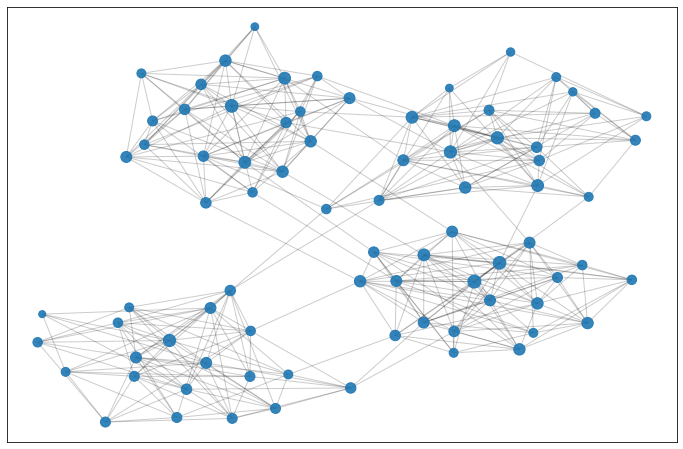

In [3]:
N = 20
clusters = 4
p_inside = 0.6
p_between = 0.01

n_vertices = N * clusters
P = p_between * np.random.rand(n_vertices, n_vertices)
for i in range(clusters):
    for x in range(N):
        for y in range(N):
            P[i*N+x][i*N+y] = p_inside * random.random()

G = nx.empty_graph(n=n_vertices)
for i in range(n_vertices):
    for j in range(n_vertices):
        if random.random() < P[i][j]:
            G.add_edge(i,j)

pretty_draw(G)


## P5.4 [30%]

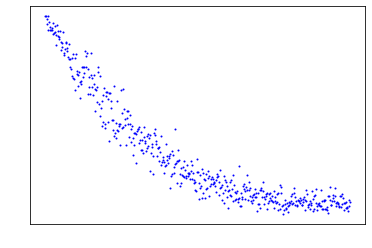

In [4]:
n = 100
k = 5
X, Y = [], []
for p in np.linspace(0, 1, num=500):
    WS = nx.generators.connected_watts_strogatz_graph(n, k, p)
    cf = nx.algorithms.average_clustering(WS)
    X.append(p)
    Y.append(cf)

plt.plot(X,Y, 'bo', markersize=1)
set_white_ticks()

## P5.6 [50%]

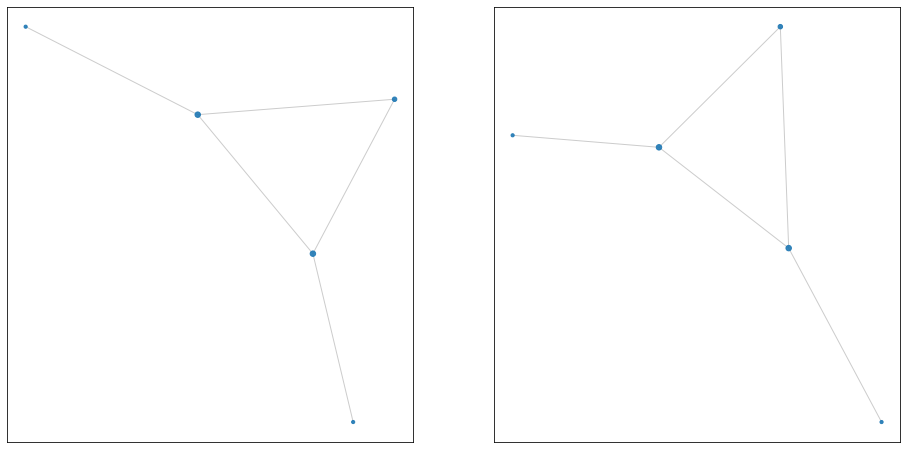

In [12]:
def apply_configuration_model(G: nx.Graph, max_iter=2000):
    dgrs = deepcopy(dict(G.degree))
    nG = nx.create_empty_copy(G)
    sum_dgrs = sum([d for d in dgrs.values()])
    while sum_dgrs > 0:
        available_nodes = [v for v, d in dgrs.items() if d > 0]
        v1 = random.choice(available_nodes)
        v2 = None
        i = max_iter
        while v2 is None or v2 == v1 or nG.has_edge(v1, v2):
            v2 = random.choice(available_nodes)
            i -= 1
            if i == 0:
                raise Exception('Number of iterations exceeded')
        nG.add_edge(v1, v2)
        dgrs[v1] -= 1
        dgrs[v2] -= 1
        sum_dgrs -= 2
    return nG


for G in [nx.generators.bull_graph(), nx.generators.cubical_graph(), nx.generators.desargues_graph()]:
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    pretty_draw(G, ax=axs[0])
    try:
        nG = apply_configuration_model(G)
        pretty_draw(nG, ax=axs[1])
    except Exception as e:
        print(e)